In [1]:
#IMPORTS
import os,urllib.request


# PROVIDE YOUR DOWNLOAD DIRECTORY HERE
datapath = '../../Data/MNISTData/'  

# CREATING DOWNLOAD DIRECTORY
if not os.path.exists(datapath):
    os.makedirs(datapath)

# URLS TO DOWNLOAD FROM
urls = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

for url in urls:
    filename = url.split('/')[-1]   # GET FILENAME
    
    if os.path.exists(datapath+filename):
        print(filename, ' already exists')  # CHECK IF FILE EXISTS
    else:
        print('Downloading ',filename)
        urllib.request.urlretrieve (url, datapath+filename) # DOWNLOAD FILE
     
print('All files are available')

All files are available


In [2]:
import os,gzip,shutil

# PROVIDE YOUR DOWNLOAD DIRECTORY HERE
datapath = '../../Data/MNISTData/'  

# LISTING ALL ARCHIVES IN THE DIRECTORY
files = os.listdir(datapath)
for file in files:
    if file.endswith('gz'):
        print('Extracting ',file)
        with gzip.open(datapath+file, 'rb') as f_in:
            with open(datapath+file.split('.')[0], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
print('Extraction Complete')

# OPTIONAL REMOVE THE ARCHIVES
for file in files:
    print('Removing ',file)
    os.remove(datapath+file)
print ('All archives removed')

Extracting  t10k-images-idx3-ubyte.gz
Extracting  train-images-idx3-ubyte.gz
Extracting  train-labels-idx1-ubyte.gz
Extracting  t10k-labels-idx1-ubyte.gz
Extraction Complete
Removing  t10k-images-idx3-ubyte.gz
Removing  train-images-idx3-ubyte.gz
Removing  train-labels-idx1-ubyte.gz
Removing  t10k-labels-idx1-ubyte.gz
All archives removed


In [1]:
import os,codecs,numpy

# PROVIDE YOUR DIRECTORY WITH THE EXTRACTED FILES HERE
datapath = '../../Data/MNISTData/'

files = os.listdir(datapath)

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):  # FOR ALL 'ubyte' FILES
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (type == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])  # NUMBER OF ROWS  (DIMENSION 1)
                num_cols = get_int(data[12:16])  # NUMBER OF COLUMNS  (DIMENSION 2)
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)  # READ THE PIXEL VALUES AS INTEGERS
                parsed = parsed.reshape(length,num_rows,num_cols)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES x HEIGHT x WIDTH]           
            elif(type == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8) # READ THE LABEL VALUES AS INTEGERS
                parsed = parsed.reshape(length)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES]                           
            if (length==10000):
                set = 'test'
            elif (length==60000):
                set = 'train'
            data_dict[set+'_'+category] = parsed  # SAVE THE NUMPY ARRAY TO A CORRESPONDING KEY

Reading  t10k-images-idx3-ubyte
Reading  t10k-labels-idx1-ubyte
Reading  train-images-idx3-ubyte
Reading  train-labels-idx1-ubyte


In [111]:
train_images = data_dict['train_images']
print(train_images.shape)
train_labels = data_dict['train_labels']
print(train_labels.shape)
test_images = data_dict['test_images']
print(test_images.shape)
test_labels = data_dict['test_labels']
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [114]:
import numpy as np
import array

np.seterr(divide='ignore', invalid='ignore')

picture_size = 784
hidden_layer_size = 32
output_layer_size = 10
batch_size = 100

# Сургах зурагны хэмжээ
train_image_size = 60000
# Divisor нь 0-1 н хооронд болгохын тулд үржиж байгаа тоо.
divisor = 1/255
print("Starting ...")
# Энд train_images гэсэн энгийн array - г numpy-ын array болгож байна. 
np.array(train_images)
np.array(train_labels)
np.array(test_images)
np.array(test_labels)
# Харин энд зураг тус бүрийг 0-1 хооронд байхаар pixel бүрээр үржиж байна гэсэн үг.
c_train_image = train_images*(divisor)
c_test_image = test_images*(divisor)

print("train image shape:")
print(c_train_image.shape);
print("test image shape:")
print(c_test_image.shape);

# За энд hidden layer-н W болон B уудыг random - р үүсгэж байна.
layer1_weight = np.random.randn(picture_size,hidden_layer_size)*0.01
print("Layer1 shape:")
print(layer1_weight.shape)
print("Layer1 weight:")
print(layer1_weight)
layer1_bias = np.random.randn(hidden_layer_size)
print("Layer1 bias shape:")
print(layer1_bias.shape)
print("Layer1 bias:")
print(layer1_bias)

# За энд гаралтын layer -н W болон B уудыг random - р үүсгэж байна.
layer2_weight = np.random.randn(hidden_layer_size,output_layer_size)*0.01
print("Layer2 weight shape:")
print(layer2_weight.shape)
print("Layer2 weight:")
print(layer2_weight)
layer2_bias = np.random.randn(output_layer_size)
print("Layer2 bias shape:")
print(layer2_bias.shape)
print("Layer2 bias:")
print(layer2_bias)

# Энд (60000,28,28) хэмжээтэй зураг аа (60000,784) хэмжээтэй вектор болгож байна.
cv_train_image = np.reshape(c_train_image,(60000,784))
print("Сургах өгөгдлөө 2 хэмжээст болгож байна.")
print(cv_train_image.shape)
cv_test_image = np.reshape(c_test_image,(10000,784))
print("Турших өгөгдлөө 2 хэмжээст болгож байна.")
print(cv_test_image.shape)

# Энд batch_size сонгож авах хэсгийг хийж байна.
#cv_train_image

print("train_image size:")
print(cv_train_image.shape[0])
print("*********************************************************************************************************")
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

# def softmax(inputs):
#     return np.exp(inputs) / float(sum(np.exp(inputs)))

def relu(x):
    return np.maximum(0,x)

batch_size = 100

for index in range(0,600,batch_size):
    batch=cv_train_image[index:min(index+batch_size,cv_train_image.shape[0]),:]
    layer1 = np.add(batch@layer1_weight,layer1_bias)
    layer1 = relu(layer1)
    layer2 = np.add(layer1@layer2_weight,layer2_bias)
    layer2 = softmax(layer2)
    for i in range(batch_size):
        correct_logprobs = -np.log(layer2[i,train_labels[i]])
        loss = loss + correct_logprobs
        print(i)
        print("Correct:",correct_logprobs)
    loss = loss / batch_size
    print("Loss:",loss)

# log_likelihood = -np.log(layer1[range(layer1_size),true_label])
# loss = np.sum(log_likelihood)/layer1_size
# print("Loss:")
# print(loss)
# print("Softmax avsni daraa:")
# print(softmax(layer1))


# print("Cross entropy is :")
# print(cross_entropy(layer1,train_labels))

# print("Delta cross entropy:")
# print(delta_cross_entropy(layer1,train_labels))

# layer2 = np.add(layer1@layer2_weight,layer2_bias)
# print("Layer2 shape is:")
# print(layer2.shape)
# print("Layer2 is:")
# print(layer2)
# print("Softmax:")
# print(softmax(layer2))



# def training(w1,b1,w2,b2,image):
#     layer1 = image@w1+b1
#     layer2 = layer1@w2 + b2
#     layer2 = ReLU(layer2)
#     return softmax(layer2)

# training(layer1_weight,layer1_bias,layer1_weight,layer2_bias,one)

# Оролт=>w1,b1=>relu=>w2,b2=>softmax=>гаралт

# def cut_data(batch_size,cv_train_image):


Starting ...
train image shape:
(60000, 28, 28)
test image shape:
(10000, 28, 28)
Layer1 shape:
(784, 32)
Layer1 weight:
[[-0.00968098 -0.0084878   0.00545755 ... -0.00354008  0.00595559
  -0.00271949]
 [ 0.01536397  0.00641367 -0.01866033 ... -0.00443649  0.0075561
  -0.01915636]
 [-0.01495688  0.01786753  0.00577678 ...  0.00288513  0.00303885
  -0.00413954]
 ...
 [-0.00103296  0.00584307  0.00891466 ...  0.00934651 -0.0165228
  -0.01170338]
 [-0.00656713  0.01216498 -0.0138833  ... -0.00120533  0.0094714
   0.00761232]
 [ 0.01537577 -0.00751408 -0.00095394 ... -0.00396408 -0.01123868
  -0.00326403]]
Layer1 bias shape:
(32,)
Layer1 bias:
[-1.68081963  2.0617518  -0.55998305  0.09204846 -1.91474646 -0.28154038
 -1.31921812  0.12749502 -0.21064128  0.03653857  1.88065955 -0.81846474
  0.71263695 -1.55213778 -0.52717581 -0.55489432 -0.77244151 -1.27902876
  0.65733558 -0.37246263 -1.81002672 -0.22800391 -0.3219701   0.2372132
 -1.4371338   1.32724911 -0.32917417  1.12665302 -0.4196108  

Correct: 4.606346333880944
96
Correct: 4.607626769756441
97
Correct: 4.607237181284487
98
Correct: 4.601843471004698
99
Correct: 4.605867114959692
Loss: 4.651411486997522
0
Correct: 4.601977963105393
1
Correct: 4.603852416208788
2
Correct: 4.605026690291176
3
Correct: 4.60272933789377
4
Correct: 4.610278987672723
5
Correct: 4.60587797955813
6
Correct: 4.6041038191966015
7
Correct: 4.607143912202925
8
Correct: 4.605536148229239
9
Correct: 4.60685618323525
10
Correct: 4.605522258995203
11
Correct: 4.603931795971167
12
Correct: 4.6039637578631245
13
Correct: 4.604147125146147
14
Correct: 4.602267478991007
15
Correct: 4.603882242454969
16
Correct: 4.604498512605917
17
Correct: 4.603560832873776
18
Correct: 4.60372157059642
19
Correct: 4.605907466392982
20
Correct: 4.6076651495901695
21
Correct: 4.607534682571613
22
Correct: 4.6110226934782474
23
Correct: 4.60564253021677
24
Correct: 4.605294577475678
25
Correct: 4.606999330995571
26
Correct: 4.606315277376943
27
Correct: 4.609145072620223


In [96]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference
nice = np.random.rand(5,5)
size = nice.shape[0]
print(size)
print(nice)
# nice = softmax(nice)
# print("Softmax avsni daraa")
# print(nice)
print("Tusgaarlay")
print(nice[range(size),2])
print("Tusgaarlay")
print("Ene bol:",nice[0,2])
print(-np.log(nice[0,2]))
print("Uzey")
correct_logprobs = -np.log(nice[range(size),2])
print("This is likelihood",correct_logprobs)
data_loss = np.sum(correct_logprobs)/size
print("________________________________________________________________")
print(data_loss)
# loss = -np.log(layer2[range(batch_size),train_labels)

5
[[0.36912458 0.01370587 0.6007524  0.89723891 0.65524452]
 [0.7890335  0.93493169 0.28394573 0.92523485 0.60085   ]
 [0.30691484 0.03030062 0.55124321 0.61056459 0.55941906]
 [0.92612876 0.38510693 0.76047246 0.38752581 0.3491065 ]
 [0.75929257 0.71072235 0.65474225 0.97900934 0.91765554]]
Tusgaarlay
[0.6007524  0.28394573 0.55124321 0.76047246 0.65474225]
Tusgaarlay
Ene bol: 0.6007523997065202
0.509572409855817
Uzey
This is likelihood [0.50957241 1.25897216 0.59557917 0.27381538 0.42351363]
________________________________________________________________
0.6122905500333081


In [54]:
batch_size = 100

for index in range(0,cv_train_image.shape[0],batch_size):
    batch=cv_train_image[index:min(index+batch_size,cv_train_image.shape[0]),:]
    print(batch.shape)

# import numpy as np
# data=np.random.rand(550,10)
# batch_size=100

# for index in range(0,data.shape[0],batch_size):
#     batch=data[index:min(index+batch_size,data.shape[0]),:]
#     print(batch.shape)
    
# print(data[min(5,9),:])    
# for i in range(0,550,100):
#     batch = data[i:min(i+100,550),:]
#     print(batch.shape)

500
(100, 10)
(100, 10)
(100, 10)
(100, 10)
(100, 10)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


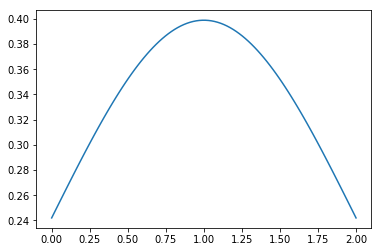

In [14]:


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 1
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 1*sigma, mu + 1*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

In [79]:
import numpy as np
ta = [58.43540903, 53.02501388, 57.71778442, 58.92268745, 56.44606285, 52.66033093,
 53.63167502, 58.72545242, 57.41629934, 52.45535283, 64.04863599, 55.95392181,
 55.36780029, 54.13148496, 51.61374528, 53.93820959]
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference
print(ta)
print("Softmax ashiglasni daraa:")
print(softmax(ta))
for i in range(0,16):
    ta[i] = ta[i] * 0.1
print("************************************************************************************")
print(ta)
print("Softmax ashiglasni daraa:")
print(softmax(ta))

[58.43540903, 53.02501388, 57.71778442, 58.92268745, 56.44606285, 52.66033093, 53.63167502, 58.72545242, 57.41629934, 52.45535283, 64.04863599, 55.95392181, 55.36780029, 54.13148496, 51.61374528, 53.93820959]
Softmax ashiglasni daraa:
[3.58228723e-03 1.60123711e-05 1.74783325e-03 5.83153296e-03
 4.90002546e-04 1.11192592e-05 2.93714395e-05 4.78767486e-03
 1.29290522e-03 9.05847304e-06 9.81643736e-01 2.99546465e-04
 1.66692038e-04 4.84161143e-05 3.90435664e-06 3.99072227e-05]
************************************************************************************
[5.843540903000001, 5.3025013880000005, 5.7717784420000005, 5.892268745, 5.644606285, 5.266033093000001, 5.3631675020000005, 5.872545242000001, 5.7416299340000005, 5.245535283000001, 6.404863599, 5.595392181, 5.536780029, 5.413148496000001, 5.1613745280000005, 5.393820959]
Softmax ashiglasni daraa:
[0.07629297 0.0444134  0.07100983 0.08010262 0.06252998 0.0428229
 0.0471912  0.0785382  0.06890094 0.04195406 0.13374078 0.05952712
 0

In [30]:
import pickle

datapath = '../../Data/MNISTData/'

# DUMPING THE DICTIONARY INTO A PICKLE 
with open(datapath+'MNISTData.pkl', 'wb') as fp :
    pickle.dump(data_dict, fp)

# LOADING THE DICTIONARY FROM A PICKLE
with open(datapath+'MNISTData.pkl', 'rb') as fp :
    new_dict = pickle.load(fp)
